In [1]:
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_json ('episodes.json')

In [3]:
print(dataset)

                                             episodes
0   {'seasonNum': 1, 'episodeNum': 1, 'episodeTitl...
1   {'seasonNum': 1, 'episodeNum': 2, 'episodeTitl...
2   {'seasonNum': 1, 'episodeNum': 3, 'episodeTitl...
3   {'seasonNum': 1, 'episodeNum': 4, 'episodeTitl...
4   {'seasonNum': 1, 'episodeNum': 5, 'episodeTitl...
5   {'seasonNum': 1, 'episodeNum': 6, 'episodeTitl...
6   {'seasonNum': 1, 'episodeNum': 7, 'episodeTitl...
7   {'seasonNum': 1, 'episodeNum': 8, 'episodeTitl...
8   {'seasonNum': 1, 'episodeNum': 9, 'episodeTitl...
9   {'seasonNum': 1, 'episodeNum': 10, 'episodeTit...
10  {'seasonNum': 2, 'episodeNum': 1, 'episodeTitl...
11  {'seasonNum': 2, 'episodeNum': 2, 'episodeTitl...
12  {'seasonNum': 2, 'episodeNum': 3, 'episodeTitl...
13  {'seasonNum': 2, 'episodeNum': 4, 'episodeTitl...
14  {'seasonNum': 2, 'episodeNum': 5, 'episodeTitl...
15  {'seasonNum': 2, 'episodeNum': 6, 'episodeTitl...
16  {'seasonNum': 2, 'episodeNum': 7, 'episodeTitl...
17  {'seasonNum': 2, 'episod

In [4]:
dataset.head(1)

episodes
0  {'seasonNum': 1, 'episodeNum': 1, 'episodeTitl...

In [5]:
nuevadata = pd.DataFrame(columns=('num', 'nombre', 'descripcion'))
with open('episodes.json') as file:
    data = json.load(file)
    numero = 1
    for episodes in data['episodes']:
        nuevadata.loc[len(nuevadata)]=[numero,episodes['episodeTitle'],episodes['episodeDescription']] 
        print('Numero:',numero)
        print('Nombre del Episodio:', episodes['episodeTitle'])
        print('Breve Descripcion:', episodes['episodeDescription'])
        print('')
        numero = numero +1

Numero: 1
Nombre del Episodio: Winter Is Coming
Breve Descripcion: Jon Arryn, the Hand of the King, is dead. King Robert Baratheon plans to ask his oldest friend, Eddard Stark, to take Jon's place. Across the sea, Viserys Targaryen plans to wed his sister to a nomadic warlord in exchange for an army.

Numero: 2
Nombre del Episodio: The Kingsroad
Breve Descripcion: While Bran recovers from his fall, Ned takes only his daughters to King's Landing. Jon Snow goes with his uncle Benjen to The Wall. Tyrion joins them.

Numero: 3
Nombre del Episodio: Lord Snow
Breve Descripcion: Lord Stark and his daughters arrive at King's Landing to discover the intrigues of the king's realm.

Numero: 4
Nombre del Episodio: Cripples, Bastards, and Broken Things
Breve Descripcion: Eddard investigates Jon Arryn's murder. Jon befriends Samwell Tarly, a coward who has come to join the Night's Watch.

Numero: 5
Nombre del Episodio: The Wolf and the Lion
Breve Descripcion: Catelyn has captured Tyrion and plans to

Numero: 65
Nombre del Episodio: Eastwatch
Breve Descripcion: Daenerys demands loyalty from the surviving Lannister soldiers; Jon heeds Bran's warning about White Walkers on the move; Cersei vows to vanquish anyone or anything that stands in her way.

Numero: 66
Nombre del Episodio: Beyond the Wall
Breve Descripcion: Jon and his team go beyond the wall to capture a wight. Daenerys has to make a tough decision.

Numero: 67
Nombre del Episodio: The Dragon and the Wolf
Breve Descripcion: Season finale of the epic series.

Numero: 68
Nombre del Episodio: Winterfell
Breve Descripcion: Jon and Daenerys arrive in Winterfell and are met with skepticism. Sam learns about the fate of his family. Cersei gives Euron the reward he aims for. Theon follows his heart.

Numero: 69
Nombre del Episodio: A Knight of the Seven Kingdoms
Breve Descripcion: The battle at Winterfell is approaching. Jaime is confronted with the consequences of the past. A tense interaction between Sansa and Daenerys follows.

Nu

In [6]:
print(nuevadata)

   num                                 nombre  \
0    1                       Winter Is Coming   
1    2                          The Kingsroad   
2    3                              Lord Snow   
3    4  Cripples, Bastards, and Broken Things   
4    5                  The Wolf and the Lion   
5    6                         A Golden Crown   
6    7                     You Win or You Die   
7    8                         The Pointy End   
8    9                                 Baelor   
9   10                         Fire and Blood   
10  11                    The North Remembers   
11  12                        The Night Lands   
12  13             What Is Dead May Never Die   
13  14                        Garden of Bones   
14  15                 The Ghost of Harrenhal   
15  16               The Old Gods and the New   
16  17                    A Man Without Honor   
17  18               The Prince of Winterfell   
18  19                             Blackwater   
19  20              

In [7]:
nuevadata.head(5)

num                                 nombre  \
0   1                       Winter Is Coming   
1   2                          The Kingsroad   
2   3                              Lord Snow   
3   4  Cripples, Bastards, and Broken Things   
4   5                  The Wolf and the Lion   

                                         descripcion  
0  Jon Arryn, the Hand of the King, is dead. King...  
1  While Bran recovers from his fall, Ned takes o...  
2  Lord Stark and his daughters arrive at King's ...  
3  Eddard investigates Jon Arryn's murder. Jon be...  
4  Catelyn has captured Tyrion and plans to bring...

In [8]:
text = nuevadata.descripcion[0]
text

"Jon Arryn, the Hand of the King, is dead. King Robert Baratheon plans to ask his oldest friend, Eddard Stark, to take Jon's place. Across the sea, Viserys Targaryen plans to wed his sister to a nomadic warlord in exchange for an army."

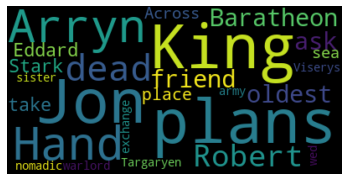

In [9]:
# Creando y generando una imagen de nube de palabras.
wordcloud = WordCloud().generate(text)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

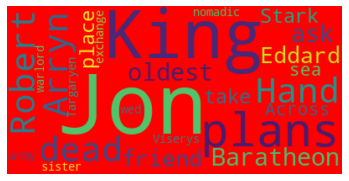

In [27]:
# Bajando el max_font_size, cambiando el número máximo de palabras y colocando un fodo de color
wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="Red").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
# Guardando la imagen
wordcloud.to_file("WordCloud1.png")

In [41]:
# Combinaciones de palabras de la columna description
capitulonombre = " ".join(review for review in nuevadata.nombre)
print ("Hay {} palabras en la combinación de los nombres de capitulos.".format(len(capitulonombre)))

capitulodescripcion = " ".join(review for review in nuevadata.descripcion)
print ("Hay {} palabras en la combinación de la descripcion del capitulo".format(len(capitulodescripcion)))

Hay 1261 palabras en la combinación de los nombres de capitulos.
Hay 13155 palabras en la combinación de la descripcion del capitulo


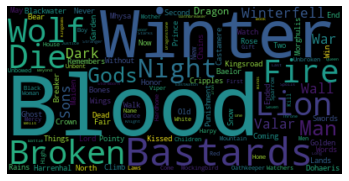

In [43]:
# Generate a word cloud image nombre capitulo
wordcloud = WordCloud(background_color="black").generate(capitulonombre)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

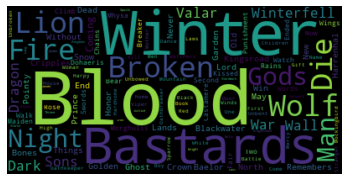

In [50]:
#Nombre capitulo con stopwords
stopwords = set(STOPWORDS)
stopwords.update([])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(capitulonombre)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

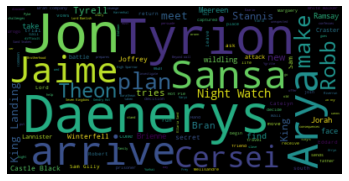

In [44]:
# Generate a word cloud image nombre capitulo
wordcloud = WordCloud(background_color="black").generate(capitulodescripcion)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

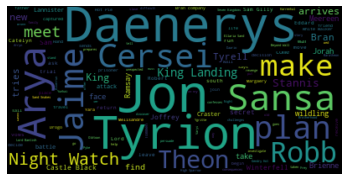

In [52]:
#Nombre capitulo con stopwords
stopwords = set(STOPWORDS)
stopwords.update(["arrive"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(capitulodescripcion)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("dragon.png"))
wine_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [239, 239, 239]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [238, 238, 238]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [238, 238, 238]],

       ...,

       [[238, 238, 238],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[238, 238, 238],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[239, 239, 239],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [60]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0

In [61]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

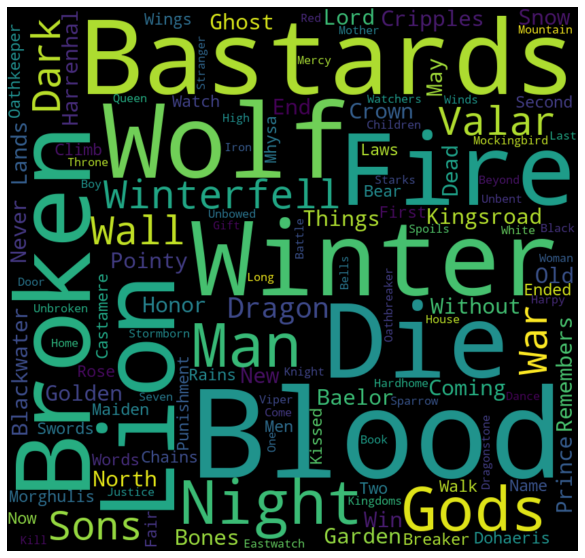

In [62]:
# Creando una imagen de nube de palabras
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
stopwordspanish

NameError: name 'stopwordspanish' is not defined